In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load ground Ground Truth 
ground_1 = pd.read_csv( 'neuroqwerty-mit-csxpd-dataset-1.0.0/MIT-CS1PD/GT_DataPD_MIT-CS1PD.csv' )
# set Patient ID as index
ground_1 = ground_1.set_index('pID')
# show part of Data Frame
ground_1.head()

,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2
pID,,,,,,,,
11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv
60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv
67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv
68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv
70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv


Text(0, 0.5, 'Typing Speed (WPM)')

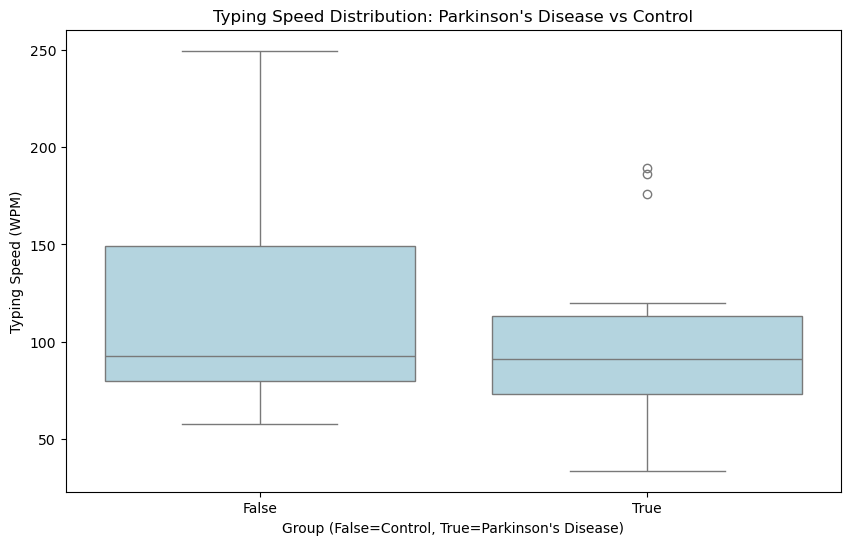

In [3]:
# Visualization 1: Box plot comparing typing speeds between PD and Control groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='gt', y='typingSpeed', data=ground_1, color = 'lightblue')
plt.title('Typing Speed Distribution: Parkinson\'s Disease vs Control')
plt.xlabel('Group (False=Control, True=Parkinson\'s Disease)')
plt.ylabel('Typing Speed (WPM)')

/Users/kaiibijlani/Classes/dsc_106/Keys-of-Parkinson-s-Patterns-and-Parkinson-s/nqDataLoader.py:149: SyntaxWarning: invalid escape sequence '\['
  pPunct=re.compile('("more")|("less")|("exclamdown")|("comma")|("\[65027\]")|("\[65105\]")|("ntilde")|("minus")|("equal")|("bracketleft")|("bracketright")|("semicolon")|("backslash")|("apostrophe")|("comma")|("period")|("slash")|("grave")')
/Users/kaiibijlani/Classes/dsc_106/Keys-of-Parkinson-s-Patterns-and-Parkinson-s/nqDataLoader.py:230: SyntaxWarning: invalid escape sequence '\.'
  p = re.compile( '([0-9]+)\.{1}([0-9]+)_([0-9]+)_([0-9]+)\.csv' )


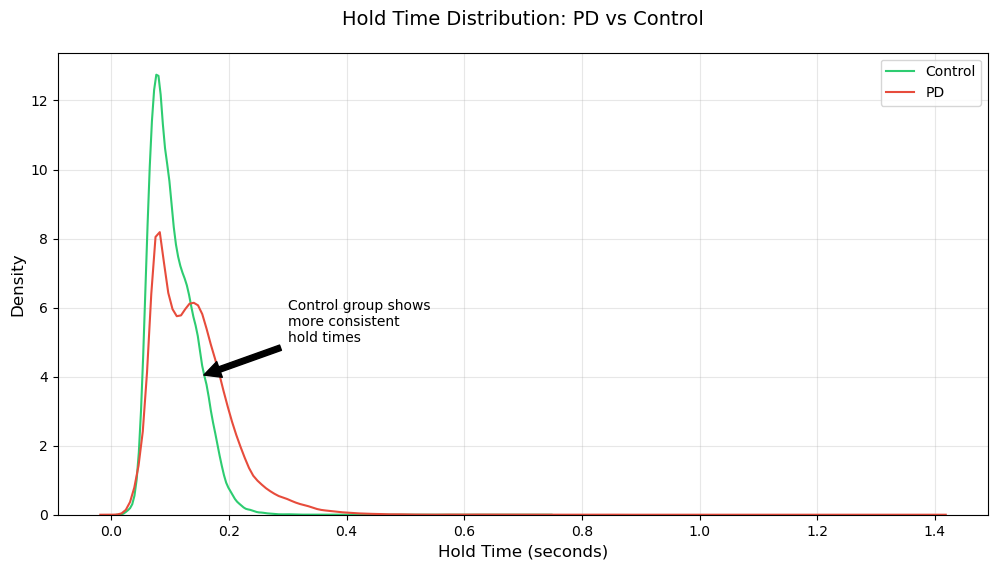

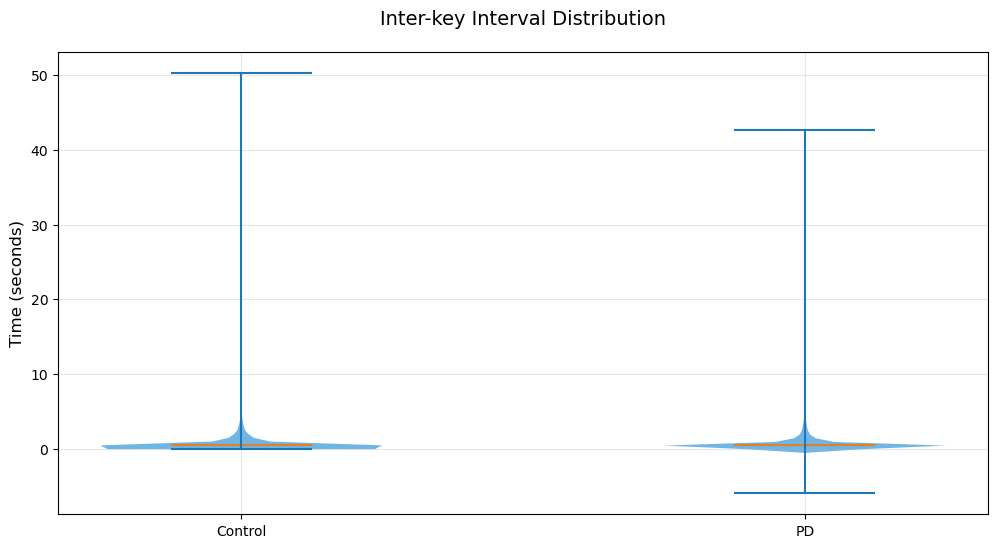

defaultdict(<class 'int'>, {'"a"': 8729, '"b"': 1418, '"i"': 3722, '"space"': 15345, '"u"': 3219, '"n"': 4618, '"v"': 680, '"e"': 9356, '"t"': 2544, '"r"': 4847, '"s"': 4891, '"p"': 2073, '"c"': 2165, '"l"': 4415, '"m"': 1830, '"d"': 3455, '"return"': 739, '"period"': 632, '"j"': 427, '"y"': 831, '"comma"': 467, '"g"': 693, '"[65104]"': 17, '"ntilde"': 216, '"o"': 7297, '"up"': 59, '"h"': 590, '"q"': 925, '"[65027]"': 26, '"[65105]"': 457, '"x"': 49, '"z"': 265, '"exclamdown"': 100, '"colon"': 94, '"caps_lock"': 164, '"minus"': 90, '"p_add"': 9, '"f"': 338, '"k"': 30, '"p_enter"': 75, '"ccedilla"': 18, '"w"': 44, '"1"': 13, '"2"': 9, '"semicolon"': 10, '"p_left"': 9, '"right"': 170, '"plus"': 8, '"less"': 6, '""': 7, '"exclam"': 46, '"9"': 5, '"quotedbl"': 13, '"apostrophe"': 3, '"periodcentered"': 1, '"underscore"': 4, '"tab"': 18, '"masculine"': 12, '"parenright"': 14, '"question"': 37, '"3"': 11, '"left"': 108, '"down"': 26, '"num_lock"': 26, '"0"': 1, '"delete"': 40, '"p_subtract"'

<Figure size 1500x500 with 0 Axes>

In [4]:
from collections import defaultdict

import sys
sys.path.append('nqDataLoader.py')
import nqDataLoader

nq = nqDataLoader.NqDataLoader()
# Initialize dictionaries to store aggregated data
all_data = {
    'pd': defaultdict(list),
    'control': defaultdict(list)
}

# Process data for each subject
for idx, row in ground_1.iterrows():
    # Load both sessions for each subject
    for file in [row['file_1'], row['file_2']]:
        keys, hold_times, press_times, release_times = nqDataLoader.getDataFiltHelper(f'neuroqwerty-mit-csxpd-dataset-1.0.0/MIT-CS1PD/data_MIT-CS1PD/{file}')
        
        group = 'pd' if row['gt'] else 'control'
        all_data[group]['hold_times'].extend(hold_times)
        all_data[group]['keys'].extend(keys)
        all_data[group]['interkey_intervals'].extend(np.diff(press_times))

# Visualization 3: Hold Time Distribution with KDE
plt.figure(figsize=(12, 6))
sns.kdeplot(data=all_data['control']['hold_times'], label='Control', color='#2ecc71')
sns.kdeplot(data=all_data['pd']['hold_times'], label='PD', color='#e74c3c')
plt.title('Hold Time Distribution: PD vs Control', fontsize=14, pad=20)
plt.xlabel('Hold Time (seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.annotate('Control group shows\nmore consistent\nhold times', 
             xy=(0.15, 4), xytext=(0.3, 5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# Visualization 4: Inter-key Interval Box Plot with Violin
plt.figure(figsize=(12, 6))
data_to_plot = []
labels = []
for group in ['control', 'pd']:
    data_to_plot.append(all_data[group]['interkey_intervals'])
    labels.extend([group.upper()] * len(all_data[group]['interkey_intervals']))

plt.subplot(111)
violin_parts = plt.violinplot(data_to_plot, showmeans=True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('#3498db')
    pc.set_alpha(0.7)
violin_parts['cmeans'].set_color('#e67e22')

plt.xticks([1, 2], ['Control', 'PD'])
plt.title('Inter-key Interval Distribution', fontsize=14, pad=20)
plt.ylabel('Time (seconds)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Visualization 5: Keyboard Heat Map
plt.figure(figsize=(15, 5))

# Define keyboard layout
keyboard_layout = [
    'qwertyuiop',
    'asdfghjkl',
    'zxcvbnm'
]

# Calculate key frequencies
key_freq = defaultdict(int)
total_keys = len(all_data['pd']['keys']) + len(all_data['control']['keys'])

for group in ['pd', 'control']:
    for key in all_data[group]['keys']:
        key_freq[key.lower()] += 1
print(key_freq)
print(total_keys)

# # Create heatmap data
# heatmap_data = []
# for row in keyboard_layout:
#     heatmap_row = []
#     for key in row:
#         heatmap_row.append(key_freq[key] / total_keys)
#     heatmap_data.append(heatmap_row)
# print(heatmap_data)
# # Plot heatmap
# sns.heatmap(heatmap_data, 
#             cmap='YlOrRd',
#             annot=True,
#             fmt='.3f',
#             cbar_kws={'label': 'Proportion of Total Keystrokes'},
#             xticklabels=False,
#             yticklabels=False)

# plt.title('Keyboard Usage Density Map', fontsize=14, pad=20)
# plt.show()

In [5]:
keyboard_data = {'control': {}, 'pd': {}}

for group in ['control', 'pd']: 
    total_group_keys = len(all_data[group]['keys']) 
    group_freq = defaultdict(int)

    for key in all_data[group]['keys']:
        group_freq[key.lower()] += 1

    # Convert to proportions
    keyboard_data[group] = {k: v/total_group_keys for k, v in group_freq.items()}

keyboard_data

{'control': {'"d"': 0.038485459113864216,
  '"e"': 0.10533124362514616,
  '"l"': 0.050302261362788266,
  '"space"': 0.17282384257531658,
  '"n"': 0.05067542353907008,
  '"f"': 0.0038808866333308457,
  '"a"': 0.09804214244844142,
  '"o"': 0.0846083041022962,
  '"m"': 0.021096101699131776,
  '"p"': 0.023359952235241437,
  '"z"': 0.0034828469786302462,
  '"r"': 0.0554021444386397,
  '"u"': 0.03545040674677215,
  '"y"': 0.009776849018583476,
  '"c"': 0.024653581113018384,
  '"h"': 0.006542776824141105,
  '"b"': 0.015473791576485808,
  '"q"': 0.010249521108540438,
  '"t"': 0.030649053411946164,
  '"i"': 0.042067816006169614,
  '"s"': 0.05560116426599,
  '"period"': 0.007413488568798666,
  '"g"': 0.007662263352986541,
  '"w"': 0.0003482846978630246,
  '"j"': 0.005249147946364156,
  '"v"': 0.008284200313456228,
  '"comma"': 0.005696942557902331,
  '"k"': 0.00039803965470059955,
  '"exclamdown"': 0.0012687513993581612,
  '"question"': 0.0004477946115381745,
  '"ntilde"': 0.002338482971366022,


In [6]:
import json
# Prepare data for D3 visualization
keyboard_data = {'control': {}, 'pd': {}}

# Calculate frequencies for each group separately
for group in ['control', 'pd']:
    total_group_keys = len(all_data[group]['keys'])
    group_freq = defaultdict(int)
    
    for key in all_data[group]['keys']:
        # Clean the key name - remove quotes and convert special keys to simple format
        clean_key = key.lower().strip('"').replace('space', ' ')
        if len(clean_key) == 1 or clean_key == ' ':  # Only include regular keys and space
            group_freq[clean_key] += 1
    
    # Convert to proportions
    keyboard_data[group] = {k: v/total_group_keys for k, v in group_freq.items()}

# Save to JSON file for D3
with open('keyboard_data.json', 'w') as f:
    json.dump(keyboard_data, f)

In [7]:
keyboard_data

{'control': {'d': 0.038485459113864216,
  'e': 0.10533124362514616,
  'l': 0.050302261362788266,
  ' ': 0.17282384257531658,
  'n': 0.05067542353907008,
  'f': 0.0038808866333308457,
  'a': 0.09804214244844142,
  'o': 0.0846083041022962,
  'm': 0.021096101699131776,
  'p': 0.023359952235241437,
  'z': 0.0034828469786302462,
  'r': 0.0554021444386397,
  'u': 0.03545040674677215,
  'y': 0.009776849018583476,
  'c': 0.024653581113018384,
  'h': 0.006542776824141105,
  'b': 0.015473791576485808,
  'q': 0.010249521108540438,
  't': 0.030649053411946164,
  'i': 0.042067816006169614,
  's': 0.05560116426599,
  'g': 0.007662263352986541,
  'w': 0.0003482846978630246,
  'j': 0.005249147946364156,
  'v': 0.008284200313456228,
  'k': 0.00039803965470059955,
  'x': 0.0005970594820508994,
  '1': 0.00014926487051272484,
  '2': 4.9754956837574944e-05,
  '3': 4.9754956837574944e-05,
  '6': 2.4877478418787472e-05,
  '4': 2.4877478418787472e-05,
  '9': 4.9754956837574944e-05},
 'pd': {'a': 0.09895628810